<a href="https://colab.research.google.com/github/AzaamAhmed/ML-Projects/blob/main/human_face_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Upload the zip file
uploaded = files.upload()

# Unzip the uploaded file
!unzip your_zip_file.zip


Saving archive.zip to archive (1).zip
unzip:  cannot find or open your_zip_file.zip, your_zip_file.zip.zip or your_zip_file.zip.ZIP.


In [8]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Changed import statement
from tensorflow.keras import Sequential  # Changed import statement
from tensorflow.keras.layers import Dense, Flatten, Dropout  # Changed import statement
from tensorflow.keras.applications import EfficientNetB0  # Pre-trained model # Changed import statement
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Changed import statement
from tensorflow.keras.models import load_model # Changed import statement
import zipfile

In [11]:
# Define the data directory (zip file path)
data_dir = '/content/archive.zip'

# Function to extract the zip file
def extract_zip_data(zip_file_path, extract_to_dir='/content/extracted_data'):
    """Extracts a zip file to the specified directory."""
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_dir)
    print(f"Data extracted to: {extract_to_dir}")
    return extract_to_dir

# Extract the data
extracted_data_dir = extract_zip_data(data_dir)

# Function to convert images into a DataFrame
def convert_img_to_df(dataset):
    img_dir = Path(dataset)
    filename = list(img_dir.glob(r'**/*.jpg'))
    label = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filename))

    filename = pd.Series(filename, name='Filepath').astype(str)
    label = pd.Series(label, name='Label')
    img_df = pd.concat([filename, label], axis=1)
    return img_df

# Load the dataset (using the extracted data directory)
img_df = convert_img_to_df(extracted_data_dir)

Data extracted to: /content/extracted_data


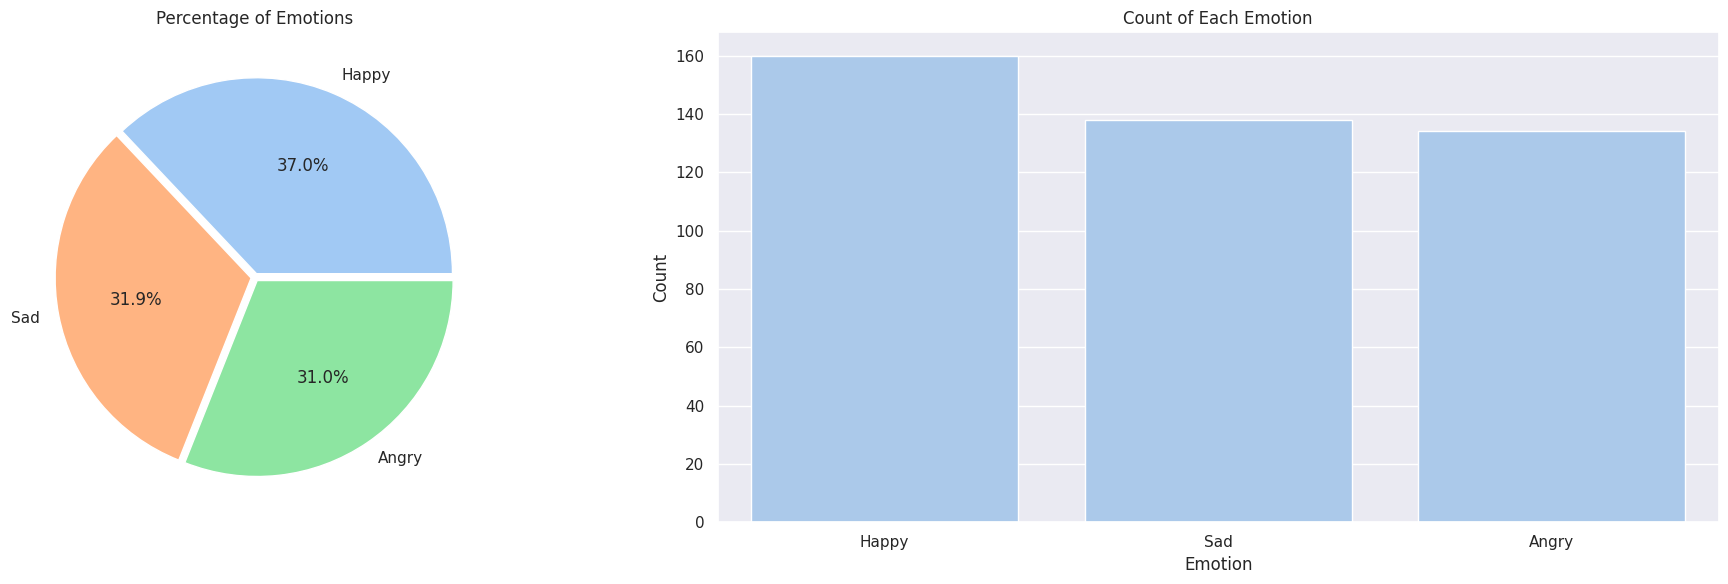

In [12]:
# Visualize data distribution
def visualize_data_distribution(img_df):
    label_count = img_df['Label'].value_counts()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
    sns.set_theme(style='darkgrid', palette='pastel')
    color = sns.color_palette(palette='pastel')
    explode = [0.02] * len(label_count)

    # Pie chart
    axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
    axes[0].set_title('Percentage of Emotions')

    # Bar plot
    sns.barplot(x=label_count.index, y=label_count.values, ax=axes[1])
    axes[1].set_title('Count of Each Emotion')
    axes[1].set_xlabel('Emotion')
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

visualize_data_distribution(img_df)


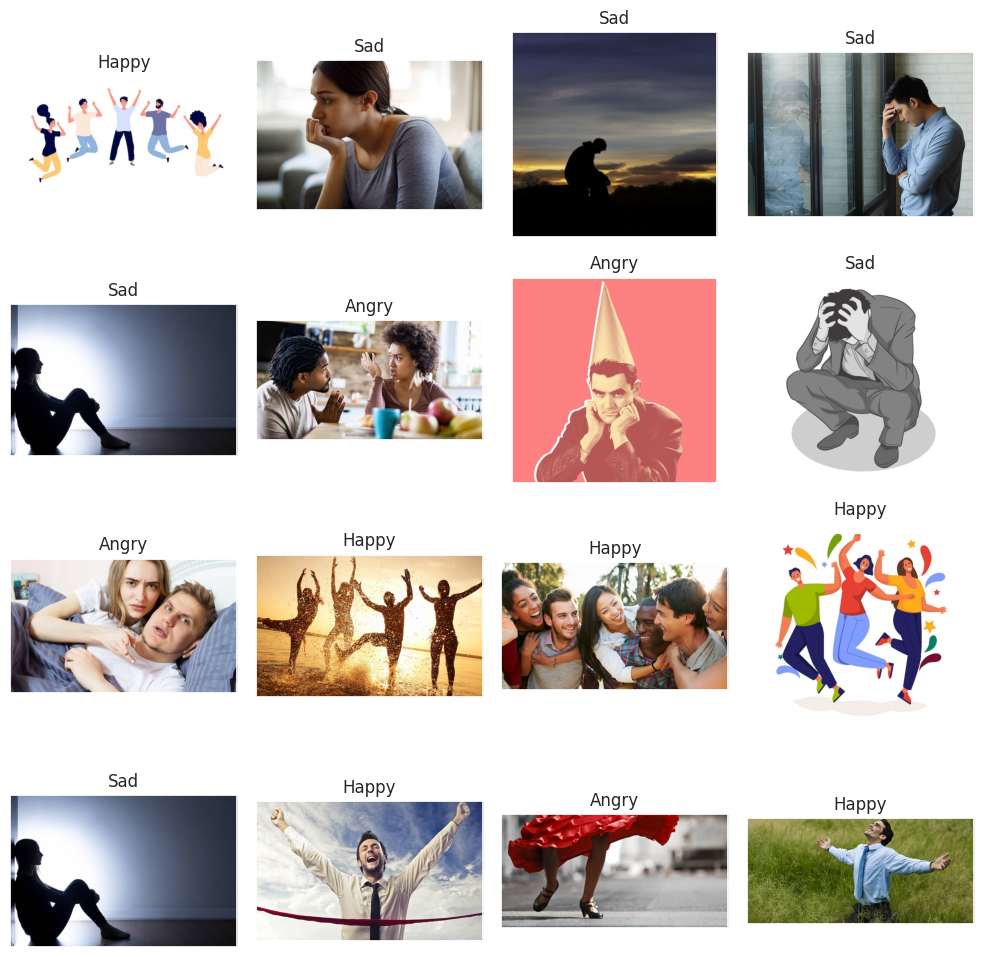

In [13]:
# Display random samples
def display_random_samples(img_df, n_samples=16):
    random_index = np.random.randint(0, len(img_df), n_samples)
    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        img = plt.imread(img_df['Filepath'].iloc[random_index[i]])
        ax.imshow(img)
        ax.set_title(img_df['Label'].iloc[random_index[i]])
    plt.tight_layout()
    plt.show()

display_random_samples(img_df)


In [14]:
# Split the dataset into training, validation, and test sets
img_train, test = train_test_split(img_df, test_size=0.1, random_state=42)
train, val = train_test_split(img_train, test_size=0.2, random_state=42)

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.15,
    height_shift_range=0.15,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    batch_size=32,
    target_size=(224, 224),
    shuffle=True,
    seed=42,
    class_mode='categorical'
)

val_set = test_datagen.flow_from_dataframe(
    dataframe=val,
    x_col='Filepath',
    y_col='Label',
    batch_size=32,
    target_size=(224, 224),
    shuffle=True,
    seed=42,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    batch_size=32,
    target_size=(224, 224),
    shuffle=False,
    seed=42,
    class_mode='categorical'
)


Found 310 validated image filenames belonging to 3 classes.
Found 78 validated image filenames belonging to 3 classes.
Found 44 validated image filenames belonging to 3 classes.


In [15]:
# Split the dataset into training, validation, and test sets
img_train, test = train_test_split(img_df, test_size=0.1, random_state=42)
train, val = train_test_split(img_train, test_size=0.2, random_state=42)

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.15,
    height_shift_range=0.15,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    batch_size=32,
    target_size=(224, 224),
    shuffle=True,
    seed=42,
    class_mode='categorical'
)

val_set = test_datagen.flow_from_dataframe(
    dataframe=val,
    x_col='Filepath',
    y_col='Label',
    batch_size=32,
    target_size=(224, 224),
    shuffle=True,
    seed=42,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    batch_size=32,
    target_size=(224, 224),
    shuffle=False,
    seed=42,
    class_mode='categorical'
)


Found 310 validated image filenames belonging to 3 classes.
Found 78 validated image filenames belonging to 3 classes.
Found 44 validated image filenames belonging to 3 classes.


In [22]:
# Import necessary libraries
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.applications import EfficientNetB0
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Build the model with a pre-trained EfficientNetB0 backbone
def build_model(num_classes):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Compile the model
model = build_model(num_classes=len(train_set.class_indices))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping and model checkpointing
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss'),  # Monitor validation loss
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')  # Save based on validation loss
]


# Train the model, handling potential empty validation set
try:
    history = model.fit(
        train_set,
        steps_per_epoch=len(train_set),
        validation_data=val_set,
        validation_steps=len(val_set),
        epochs=30,
        callbacks=callbacks,
        verbose=1
    )
except ValueError as e:
    if "Data cardinality is ambiguous" in str(e):
        print("Warning: Validation set is empty. Training without validation.")
        history = model.fit(
            train_set,
            steps_per_epoch=len(train_set),
            epochs=30,
            callbacks=callbacks,
            verbose=1
        )
    else:
        # Raise the original error if it's not related to validation set emptiness
        raise e

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4560 - loss: 3.3562 

10/10 ━━━━━━━━━━━━━━━━━━━━ 184s 12s/step - accuracy: 0.4603 - loss: 3.3813 - val_accuracy: 0.2949 - val_loss: 14.4597
Epoch 2/30


AttributeError: 'NoneType' object has no attribute 'items'

In [23]:
# Evaluate the model on the test set
score = model.evaluate(test_set, steps=len(test_set), verbose=0)
print('Test Loss: {:.2f}'.format(score[0]))
print('Test Accuracy: {:.2f}'.format(score[1]))

# Predict on test set and generate classification report
y_true = test_set.classes
y_pred = model.predict(test_set)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
report = classification_report(y_true, y_pred_classes, target_names=test_set.class_indices.keys())
print(report)


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss: 10.58
Test Accuracy: 0.45
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00         8
       Happy       0.45      1.00      0.62        20
         Sad       0.00      0.00      0.00        16

    accuracy                           0.45        44
   macro avg       0.15      0.33      0.21        44
weighted avg       0.21      0.45      0.28        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
# Function for real-time prediction using webcam
def predict_emotion(frame, model, class_names):
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0) / 255.0
    prediction = model.predict(img)
    emotion_index = np.argmax(prediction, axis=1)[0]
    emotion = class_names[emotion_index]
    return emotion

# Load the saved model
model.load_weights('best_model.keras')
class_names = list(train_set.class_indices.keys())

# Start the webcam for real-time emotion detection
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Predict emotion
    emotion = predict_emotion(frame, model, class_names)

    # Display the emotion on the frame
    cv2.putText(frame, f'Emotion: {emotion}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.imshow('Emotion Detection', frame)

    # Break loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


In [42]:
import cv2

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Could not open webcam")
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        cv2.imshow("Webcam Test", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


Could not open webcam
